In [1]:
import spacy
import scispacy
import pickle
import numpy as np
import pandas as pd

In [2]:
import re
import en_ner_bionlp13cg_md

In [15]:
from sklearn.cluster import KMeans

In [3]:
nlp = en_ner_bionlp13cg_md.load()

In [4]:
#tokenizer split on '/' also
infixes = nlp.Defaults.infixes + (r'''/''',)
infix_regex = spacy.util.compile_infix_regex(infixes)
nlp.tokenizer.infix_finditer = infix_regex.finditer

In [5]:
#merge identified ents into chunks
merge_ents = nlp.create_pipe("merge_entities")
nlp.add_pipe(merge_ents)

In [6]:
def keep_token(t):
    return (t.ent_type != 0) and (t.__len__() > 1)

In [8]:
import os
os.chdir('/Volumes/BethMac/Metis Proj 4 data/')

In [9]:
with open('title_abstract_docs_list.pickle', 'rb') as read_file:
    abstracts = pickle.load(read_file)

In [10]:
len(abstracts)

337871

In [11]:
import re

In [12]:
abstracts = list(map(lambda x: re.sub('\\n',' ', x),abstracts))

In [20]:
nlp_abstracts = nlp.pipe(abstracts, disable=["tagger","parser"])

In [21]:
docs = []
count = 0

for doc in nlp_abstracts:
    docs.append([re.sub('[)(]|\-$','',t.lemma_.lower())+"_"+t.ent_type_ for t in doc if keep_token(t)])
    count += 1
    if count%1000 == 0:
        print(count)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [1121]:
docs_genes = []
for doc in docs:
    docs_genes.append([t for t in doc if (t.find("GENE") != -1) and (t.startswith('doi_') != True) and t.startswith('usa_') != True and t.startswith('boston_') != True and t.startswith("uk_") != True and t.startswith('gfp_') != True and t.startswith('luciferase_') != True and t.startswith('/_') != True and t.startswith('e.g._') != True and t.startswith('microm.') != True ])

In [1122]:
len(docs_genes)

337871

In [1123]:
docs_dict = Dictionary(docs_genes)

In [1124]:
len(docs_dict)

362425

In [1125]:
docs_dict.filter_extremes(no_below=5, no_above=0.1)

In [1126]:
docs_dict.compactify()

In [1127]:
len(docs_dict)

41089

In [1128]:
docs_corpus = [docs_dict.doc2bow(doc) for doc in docs]

In [1129]:
model_tfidf = TfidfModel(docs_corpus, id2word=docs_dict)

In [1130]:
docs_tfidf  = model_tfidf[docs_corpus]

In [566]:
from gensim.models import nmf

In [722]:
neg_matrix = nmf.Nmf(docs_tfidf, num_topics=25)

In [144]:
from sklearn.cluster import KMeans

In [1]:
import pickle
import os
os.chdir('/Volumes/BethMac/Metis Proj 4 data/')

In [2]:
with open('A_25_topic_nmf.pickle', 'rb') as read_file:
    nmf = pickle.load(read_file)

with open('dict_for_nmf.pickle', 'rb') as read_file:
    doc_dict = pickle.load(read_file)
    
with open('docs_for_nmf.pickle', 'rb') as read_file:
    docs = pickle.load(read_file)    

In [34]:
nmf_term_topic = nmf.get_topics()

In [35]:
sum(nmf_term_topic[1] > 0)

14051

In [36]:
nmf_term_topic.shape

(25, 30642)

In [38]:
import pandas as pd

In [39]:
nmf_term_topic = pd.DataFrame(nmf_term_topic)

In [41]:
nmf_term_topic.columns = doc_dict.values()

In [42]:
nmf_term_topic = nmf_term_topic.transpose()


nmf 0 = IFNs, jak
nmf 1 = p53
nmf 2 = b-cell and toll like
nmf 3 = nitric oxide
nmf 4 = camp
nmf 5 = nfkb
nmf 6 = wnt and tgfb
nmf 7 = g-protein receptors
nmf 8 = interleukins, jak
nmf 9 = mtor and akt
nmf 10 = insulin and igf
nmf 11 = thrombin, clotting
nmf 12 = egfr
nmf 13 = androgen and nfkb
nmf 14 = notch
nmf 15 = pkc and lipids
nmf 16 = unfolded protein response, er and golgi
nmf 17 = actin and tyrosine-kinase receptors
nmf 18 = integrin adhesion
nmf 19 = t-cell receptor
nmf 20 = chemotaxis
nmf 21 = pkc and calcium
nmf 22 = extrinsic apoptosis
nmf 23 = IL-6, intrinsic apoptosis
nmf 24 = tnf-alpha, tgfb, serotonin

In [150]:
nmf_term_topic.sort_values(21,ascending=False).head(20)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
pkc_GENE_OR_GENE_PRODUCT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.635109e-03,0.000000,0.295121,0.000000,0.000000,0.000004
protein kinase c_GENE_OR_GENE_PRODUCT,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000733,0.000000,...,0.305021,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.027193,0.000000,0.000000,0.000277
pka_GENE_OR_GENE_PRODUCT,0.000800,0.000000,0.000000,0.000000,0.049709,0.000161,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000354,0.002053,0.000029,0.000000e+00,0.000000,0.017074,0.000000,0.000000,0.000000
erk_GENE_OR_GENE_PRODUCT,0.000000,0.008075,0.000000,0.000000,0.002857,0.026337,0.000000,0.003030,0.001082,0.003666,...,0.000000,0.000000,0.037148,0.003786,0.000000e+00,0.000000,0.009583,0.000000,0.001108,0.000000
mapk_GENE_OR_GENE_PRODUCT,0.000000,0.006970,0.000000,0.000000,0.002468,0.025660,0.000000,0.001278,0.001148,0.001693,...,0.000000,0.000000,0.022045,0.000000,4.642342e-04,0.000000,0.009246,0.000000,0.000670,0.000000
pkcalpha_GENE_OR_GENE_PRODUCT,0.000021,0.000084,0.000000,0.000000,0.000000,0.000360,0.000000,0.000110,0.000399,0.000013,...,0.000333,0.000031,0.000050,0.000216,0.000000e+00,0.000000,0.009243,0.000000,0.000018,0.000194
erk1_GENE_OR_GENE_PRODUCT,0.000000,0.002342,0.000000,0.000000,0.003623,0.009938,0.000000,0.000650,0.001001,0.001721,...,0.000000,0.000418,0.011343,0.002552,0.000000e+00,0.000000,0.008541,0.000000,0.001776,0.000326
plc_GENE_OR_GENE_PRODUCT,0.000000,0.000079,0.000000,0.000028,0.000226,0.000000,0.000000,0.029261,0.000000,0.000551,...,0.000874,0.000207,0.000141,0.000000,0.000000e+00,0.000000,0.007386,0.000000,0.000000,0.000470
pkcs_GENE_OR_GENE_PRODUCT,0.000000,0.000024,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000045,...,0.001038,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.007009,0.000000,0.000000,0.000000
pkc alpha_GENE_OR_GENE_PRODUCT,0.000018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000020,0.000000,0.000014,1.152071e-07,0.000000,0.005440,0.000000,0.000000,0.000000


In [3]:
docs_corpus = [doc_dict.doc2bow(doc) for doc in docs]

In [4]:
doc_topics = nmf.get_document_topics(docs_corpus)

In [5]:
len(doc_topics)

337871

In [7]:
import numpy as np

In [8]:
doc_topic_matrix = np.zeros((337871,25))

In [9]:

for i, doc in enumerate(doc_topics):
    for p in doc:
        doc_topic_matrix[i,p[0]] = p[1]
    

In [10]:
doc_topic_matrix.shape

(337871, 25)

In [11]:
keep_abstract = doc_topic_matrix.sum(axis=1)!= 0

In [12]:
doc_topic_matrix[keep_abstract].shape

(294319, 25)

In [13]:
doc_topic_matrix = doc_topic_matrix[keep_abstract]

In [179]:
inertias = []

for k in np.arange(25, 55, 5):
    km = KMeans(n_clusters=k)
    km.fit(doc_topic_matrix)
    inertias.append(km.inertia_)

In [184]:
for k in np.arange(55, 80, 5):
    km = KMeans(n_clusters=k)
    km.fit(doc_topic_matrix)
    inertias.append(km.inertia_)

In [190]:
inertias_low = []
for k in np.arange(10, 25, 5):
    km = KMeans(n_clusters=k)
    km.fit(doc_topic_matrix)
    inertias_low.append(km.inertia_)

In [191]:
intertias_2 = inertias_low + inertias

In [181]:
import matplotlib.pyplot as plt

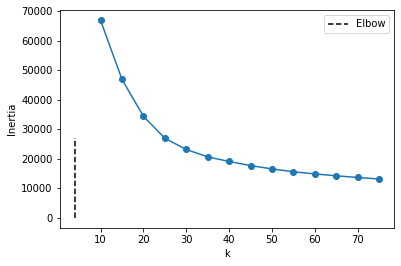

In [192]:
plt.plot(np.arange(10, 80, 5), intertias_2, marker='o')
plt.vlines(x=4, ymin=0, ymax=max(inertias), ls='--', label='Elbow')
plt.ylabel("Inertia")
plt.xlabel('k')
plt.legend();

In [94]:
km = KMeans(n_clusters=30)
km.fit(doc_topic_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [275]:
with open('kmeans_on_nmf_25.pickle', 'wb') as write_file:
    pickle.dump(km, write_file)

In [95]:
len(km.labels_)

294319

In [96]:
cluster_centers = km.cluster_centers_

In [21]:
from collections import Counter

In [60]:
import pandas as pd

In [97]:
cluster_sizes = pd.Series(Counter(km.labels_)).sort_index()

In [293]:
cluster_sizes

0      5241
1     14154
2     13188
3     18853
4      7204
5     12672
6      8325
7     14425
8      7261
9      5787
10     6259
11     8490
12    10347
13     9899
14    11999
15    13825
16     6060
17     5102
18    11128
19     2676
20    14464
21     9471
22     6765
23    31391
24     3138
25     4675
26     3001
27     7604
28    12819
29     8096
dtype: int64

In [28]:
from sklearn.manifold import TSNE

In [98]:
clusters_embedded = TSNE(n_components=2, learning_rate=10, perplexity=4).fit_transform(cluster_centers)

In [107]:
x = [i[0] for i in clusters_embedded]

In [108]:
y = [i[1] for i in clusters_embedded]

In [30]:
import seaborn as sns

In [102]:
cluster_colors=np.arange(0,30)

In [84]:
import matplotlib.pyplot as plt

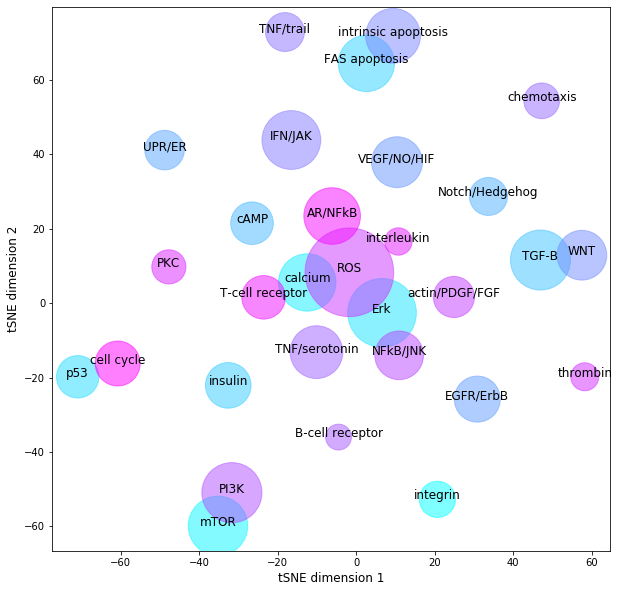

In [713]:
plt.figure(figsize=(10,10))
plt.scatter(x,y, 
            c = cluster_colors, s=(cluster_sizes/4), cmap="cool", alpha=0.5)
i=-1
for x_lab,y_lab in zip(x,y):
    i +=1
    plt.annotate(topic_labels[i],(x_lab,y_lab), ha="center", fontsize=12)

plt.xlabel('tSNE dimension 1',fontsize=12)
plt.ylabel('tSNE dimension 2', fontsize=12)

plt.savefig('tSNE_2.jpg')

In [120]:
len(keep_abstract)

337871

In [121]:
len(docs)

337871

In [525]:
keep_docs = np.array(docs)

In [526]:
keep_docs = keep_docs[keep_abstract]

In [527]:
len(keep_docs)

294319

In [528]:
sum(keep_abstract)

294319

In [529]:
keep_docs = pd.DataFrame({'genes':keep_docs, 'label':km.labels_})

In [568]:
from collections import defaultdict
genes_dict = defaultdict(list)

for i in range(0,30):
    group = keep_docs[keep_docs['label']==i]['genes']
    group = [g.replace("_GENE_OR_GENE_PRODUCT",'') for j in list(group) for g in j]
    genes_dict[i]= pd.Series(group).value_counts()/cluster_sizes[i]*100

In [362]:
keep_docs.head()

,other,label
0,"[rat hypothalamus_ORGANISM, neurointermediate ...",7
1,"[human interleukin-2_ORGANISM, mouse cells_ORG...",26
2,"[human natural killer cells_ORGANISM, manuscri...",19
3,"[blood glucose_ORGANISM_SUBSTANCE, intravenous...",6
4,"[phorbol ester_SIMPLE_CHEMICAL, human hematopo...",25


In [425]:
from scipy.stats import gaussian_kde

In [436]:
for_steamplot = []
for i in range(30):
    kde = gaussian_kde(keep_docs[keep_docs['label']==i].index)
    kde = kde(np.linspace(0,294319))
    for_steamplot.append(kde)
    

In [496]:
for i in range(30):
    for_steamplot[i] = for_steamplot[i] * cluster_sizes[i]

Text(100000, -0.35, 'p53')

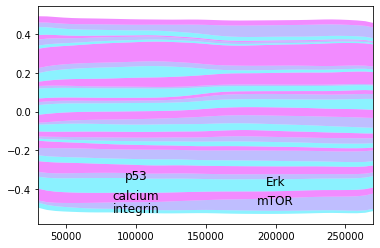

In [519]:
plt.figure(figsize=(15,15))
plt.stackplot(np.linspace(0,294319), for_steamplot, baseline='wiggle',colors=colors,labels=topic_labels, alpha=0.5);
plt.xlim(30000,270000)

plt.annotate(topic_labels[0],(100000,-0.52), ha="center", fontsize=12)
plt.annotate(topic_labels[1],(200000,-0.48), ha="center", fontsize=12)
plt.annotate(topic_labels[2],(100000,-0.45), ha="center", fontsize=12)
plt.annotate(topic_labels[3],(200000,-0.38), ha="center", fontsize=12)
plt.annotate(topic_labels[4],(100000,-0.35), ha="center", fontsize=12)


In [660]:
colors = plt.cm.cool(np.linspace(0.1,0.9,30)) 

In [463]:
colors =colors.tolist() * 10

In [451]:
np.random.shuffle(colors)

In [294]:
#genes_dict[23].head(40)

In [227]:
with open('docs_annotated_ner.pickle', 'rb') as read_file:
    docs_ner = pickle.load(read_file)

In [228]:
docs_other = []
for doc in docs_ner:
    docs_other.append([t for t in doc if (t.find("GENE") == -1) and (t.startswith('doi_') != True) and t.startswith('usa_') != True and t.startswith('boston_') != True and t.startswith("uk_") != True and t.startswith('gfp_') != True and t.startswith('luciferase_') != True and t.startswith('/_') != True and t.startswith('e.g._') != True and t.startswith('microm.') != True ])

In [229]:
len(docs_other)

337871

In [230]:
keep_docs = np.array(docs_other)

In [231]:
keep_docs = keep_docs[keep_abstract]

In [523]:
keep_docs.head()

,other,label
0,"[rat hypothalamus_ORGANISM, neurointermediate ...",7
1,"[human interleukin-2_ORGANISM, mouse cells_ORG...",26
2,"[human natural killer cells_ORGANISM, manuscri...",19
3,"[blood glucose_ORGANISM_SUBSTANCE, intravenous...",6
4,"[phorbol ester_SIMPLE_CHEMICAL, human hematopo...",25


In [233]:
sum(keep_abstract)

294319

In [237]:
keep_docs = pd.DataFrame({'other':keep_docs, 'label':km.labels_})

In [234]:
import re

In [521]:
from collections import defaultdict
other_dict = defaultdict(list)

for i in range(0,30):
    group = keep_docs[keep_docs['label']==i]['other']
    group = [re.sub("_.*",'', g) for j in list(group) for g in j]
    other_dict[i]= pd.Series(group).value_counts()/cluster_sizes[i]*100

In [712]:
topic_labels=['integrin','mTOR','calcium','Erk','p53','FAS apoptosis','insulin','TGF-B','cAMP','Notch/Hedgehog'\
             ,'UPR/ER','EGFR/ErbB','VEGF/NO/HIF','WNT','intrinsic apoptosis','IFN/JAK','TNF/trail'\
             ,'chemotaxis','TNF/serotonin','B-cell receptor','PI3K','NFkB/JNK','actin/PDGF/FGF','ROS','thrombin'\
             ,'PKC', 'interleukin', 'T-cell receptor', 'AR/NFkB', 'cell cycle']

In [541]:
with open('genes_dict.pickle','wb') as write_file:
    pickle.dump(genes_dict,write_file)
with open('other_dict.pickle','wb') as write_file:
    pickle.dump(other_dict, write_file)

In [685]:
def top_categories_other(string):
    output=[]
    for i in range(30):
        try:
            output.append((topic_labels[i],other_dict[i][string]))
        except:
            continue
    return sorted(output, key=lambda x: x[1], reverse=True)

In [611]:
def top_categories(string):
    output=[]
    for i in range(30):
        try:
            output.append((topic_labels[i],genes_dict[i][string]))
        except:
            continue
    return sorted(output, key=lambda x: x[1], reverse=True)

In [683]:
def plot_top_categories(string):
    output = top_categories(string)
    colors = plt.cm.cool(np.linspace(0.1,0.9,10))[::-1]
    plt.figure(figsize=(10,5))
    plt.bar(x=range(len(output)),height=list(map(lambda x:x[1],output)),color=colors,alpha=0.5)
    plt.xticks(ticks=range(len(output)),labels=list(map(lambda x:x[0],output)),rotation=90,fontsize=13)
    plt.xlabel('Pathway',fontsize=13)
    plt.ylabel('(Mentions / Number of Abstracts) * 100',fontsize=13)
    plt.title(string, fontsize=14)

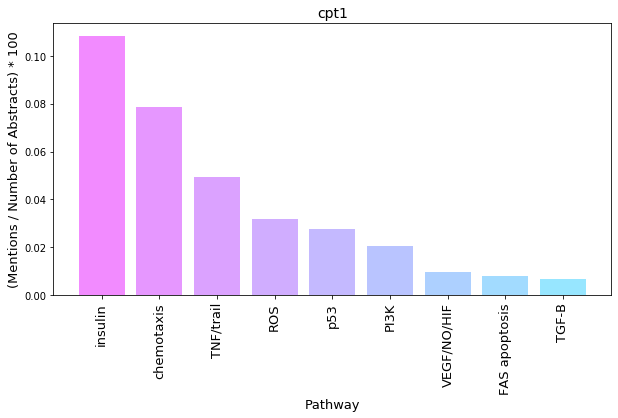

In [684]:
plot_top_categories('cpt1')
plt.savefig('cpt1.jpg')

In [686]:
def plot_top_categories_other(string):
    output = top_categories_other(string)
    colors = plt.cm.cool(np.linspace(0.1,0.9,10))[::-1]
    plt.figure(figsize=(10,5))
    plt.bar(x=range(len(output)),height=list(map(lambda x:x[1],output)),color=colors,alpha=0.5)
    plt.xticks(ticks=range(len(output)),labels=list(map(lambda x:x[0],output)),rotation=90,fontsize=13)
    plt.xlabel('Pathway',fontsize=13)
    plt.ylabel('(Mentions / Number of Abstracts) * 100',fontsize=13)
    plt.title(string, fontsize=14)

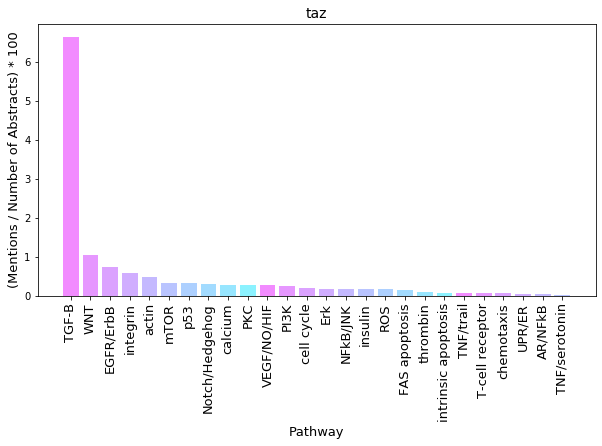

In [707]:
plot_top_categories('taz')
plt.savefig('taz.jpg')

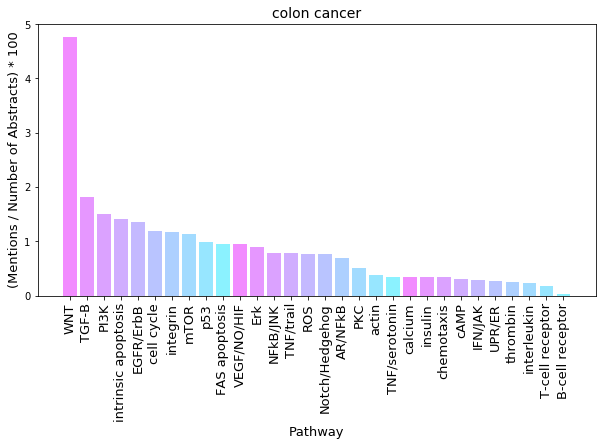

In [690]:
plot_top_categories_other('colon cancer')
plt.savefig('colon_cancer.jpg')

In [714]:
final_dict = {}

for i in range(0,30):
    final_dict[topic_labels[i]] = genes_dict[i].head(30).index

In [715]:
pd.DataFrame(final_dict,index=range(0,30))

,integrin,mTOR,calcium,Erk,p53,FAS apoptosis,insulin,TGF-B,cAMP,Notch/Hedgehog,...,PI3K,NFkB/JNK,actin/PDGF/FGF,ROS,thrombin,PKC,interleukin,T-cell receptor,AR/NFkB,cell cycle
0,integrin,akt,src,erk,p53,fas,insulin,tgf-beta,camp,notch,...,akt,nf-kappab,actin,nrf2,thrombin,pkc,il-2,tcr,nf-κb,ras
1,fak,mtor,bcr,mapk,atm,caspase,igf-i,rho,pka,notch1,...,pi3k,jnk,pdgf,cox-2,tf,protein kinase c,protein kinase c,gpcrs,ar,p53
2,fibronectin,pi3k,s1p,erk1,p21,il-6,igf-1,smad,cftr,hedgehog,...,erk,p38,actin cytoskeleton,hgf,par1,pka,il-15,src,androgen,c-myc
3,focal adhesion kinase,pten,abl,p38,mdm2,bcl-2,akt,tgf,creb,hh,...,ampk,ap-1,clathrin,leptin,par-1,erk,interleukin-2,g-protein,il-8,rb
4,ilk,mtorc1,apc,jnk,chk1,stat3,igf,rhoa,protein kinase a,paf,...,mtor,c-jun,rac1,met,pars,pkcalpha,il-7,syk,ubiquitin,myc
5,paxillin,ampk,[ca2+]i,mek,bax,fasl,irs-1,beta-catenin,epac,hes1,...,mapk,erk,fgf,c-met,csf,mapk,stat5,plc,tlr4,p21
6,src,phosphatidylinositol 3-kinase,tcr,p38 mapk,rb,caspase-3,insulin receptor,smad3,hcg,notch3,...,pten,mapk,cdc42,pge2,par2,erk1,il-2r,phospholipase c,androgen receptor,bcl-2
7,collagen,pik3ca,protein-protein,mitogen-activated protein kinase,chk2,bax,igf-1r,smad2,adenylyl cyclase,dll4,...,erk1,tnfalpha,rac,app,fibrinogen,pkcdelta,jak3,lck,epo,bax
8,igg,mtorc2,trpv1,ras,arf,caspase-8,leptin,wnt,lh,notch2,...,insulin,c-jun n-terminal kinase,f-actin,hsp90,par,marcks,calcineurin,rgs,tlr2,e2f
9,laminin,phosphoinositide 3-kinase,gnrh,nf-kappab,cip1,cd95,adiponectin,e-cadherin,pde4,jagged1,...,ras,ikappabalpha,ret,il-4,apc,plc,cd28,zap-70,p65,p27


In [716]:
with open('final_dict.pickle', 'wb') as write_file:
    pickle.dump(final_dict, write_file)

In [711]:
from tabulate import tabulate

ModuleNotFoundError: No module named 'tabulate'

In [710]:
final_dict.to_markdown()

AttributeError: 'dict' object has no attribute 'to_markdown'

In [66]:
from gensim.corpora import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.models import nmf

In [71]:
docs_dict_other = Dictionary(docs_other)

In [72]:
len(docs_dict_other)

410572

In [73]:
docs_dict_other.filter_extremes(no_below=5, no_above=0.1)

In [74]:
docs_dict_other.compactify()

In [75]:
len(docs_dict_other)

44986

In [76]:
docs_corpus = [docs_dict_other.doc2bow(doc) for doc in docs_other]

In [77]:
model_tfidf = TfidfModel(docs_corpus, id2word=docs_dict_other)

In [78]:
docs_tfidf  = model_tfidf[docs_corpus]

In [110]:
neg_matrix_3 = nmf.Nmf(docs_tfidf, num_topics=25)

In [111]:
nmf_term_topic_other = neg_matrix_3.get_topics()

In [112]:
sum(nmf_term_topic_other[1] > 0)

14426

In [113]:
nmf_term_topic_other = pd.DataFrame(nmf_term_topic_other)

In [114]:
nmf_term_topic_other.columns = docs_dict_other.values()

In [115]:
nmf_term_topic_other = nmf_term_topic_other.transpose()

0 - tpa and muscle 
1 - macrophage and monocyte and neuron
2 - b cells
3 - various cellular components
4 - nucelar
5 - lymphocyte
6 -
7 - neutrophil
8 - neuromuscular
9 - amino acids
10 - brain and cns
11 - tumors, tissues, stem cells
12 - platelets
13 - vascular cells
14 - lipid membranes
15 - t-cells
16 - neurons
17 - ?
18 - heart
19 - chromatin
20 - eye
21 - calcium 
22 - calcium
23 - t-cells
24 - keratinocyte

In [628]:
nmf_term_topic_other.sort_values(1,ascending=False).head(20)

NameError: name 'nmf_term_topic_other' is not defined